<a href="https://colab.research.google.com/github/ADHITHYA-P-T/ADHITHYA-P-T-shapeAL_PYTHON_MACHINE_LEARNING/blob/main/HR_SALARY_PREDICTION_DASHBOARD_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem statement

**The goal of this project is to clean the data ,analysis and predict whether a person's salary is higher or lower than** **$50k/year based on their attributes using several ML classification techniques**

##### importing the  collected data to python environment

In [3]:
#importing necessary libraries
import numpy as np
import pandas as pd

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from collections import Counter
def printmd(string):
    display(Markdown(string))

#import sys and warnings to ignore  warning messeges
import sys
import warnings
%matplotlib inline

if not sys.warnoptions:
    warnings.simplefilter("ignore")

data = pd.read_csv(r'/content/salarydata-TCS.csv')

In [ ]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Salary
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## Understanding the dataset

In [ ]:
data.shape

(48842, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  Salary           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
def data_info(data):
    print('Number of columns in the dataset: ',data.shape[1])
    print('Number of rows in the dataset: ',data.shape[0])
    print('Total number of datapoints in the dataset:',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('Count of Numerical features : ',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('Count of categorical Features:', len(cat_features))
data_info(data)

Number of columns in the dataset:  15
Number of rows in the dataset:  48842
Total number of datapoints in the dataset: 732630
Count of Numerical features :  6
Count of categorical Features: 9


In [ ]:
#loops and print unique values in each column
#this step is just for data understanding part
#it not integral to straightforward Analysis

def unique_checker(data):
    for col in data.columns:
        print("Unique values in {} feature.".format(col))
        print(data[col].unique(),"\n")
        print("*"*40)

In [ ]:
unique_checker(data)

Unique values in age feature.
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86] 

****************************************
Unique values in workclass feature.
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

****************************************
Unique values in fnlwgt feature.
[226802  89814 336951 ... 129912 255835 257302] 

****************************************
Unique values in education feature.
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

****************************************
Unique values in educational-num feature.
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1] 

***********************************

In [ ]:
#count of each value under each feature in the data
def count_checker(data):
    for col in data.columns:
        print("count for each category of values in {} feature.".format(col))
        print(data[col].value_counts(),"\n")
        print("*"*40)

In [ ]:
count_checker(data)

count for each category of values in age feature.
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64 

****************************************
count for each category of values in workclass feature.
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 

****************************************
count for each category of values in fnlwgt feature.
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: fnlwgt, Length: 28523, dtype: int64 

****************************************
count for each category of values in education feature.
HS-grad         15784
Some-college    10878
Bachel

#### Findings:-

In [ ]:
df = pd.DataFrame(data)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Salary'],
      dtype='object')

In [ ]:
### Renaming the columns

In [ ]:
#replacing some special character columns nameswith proper names
df.rename(columns={'capital-gain':'capital_gain','capital-loss':'capital_loss','native-country':'native_country','hours-per-week':'hours_per_week'},inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'Salary'],
      dtype='object')

## Data Cleaning

### 1. Missing values

In [ ]:
#check the missing values
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
Salary             0
dtype: int64

**above sum shows there are no null values in dataset**

In [ ]:
#we can see that there are some special characters in the data like ('?')
# finding special characters in the data frame
df.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      857
Salary                0
dtype: int64

##### Findings

*we see that there is a special character as '?' for columns workclass ,occupation ,native_country,we need to clean those data
In this case , missing value fall into categorical features*

In [ ]:
df['native_country'] = df['native_country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

In [ ]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      857
Salary                0
dtype: int64

In [ ]:
df = df.fillna(df.mode().iloc[0])

In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
Salary             0
dtype: int64

### 2.Remove duplicate data

In [ ]:
#checking for duplicated entries
sum(df.duplicated(df.columns))

53

In [ ]:
#delete duplicates
df = df.drop_duplicates(df.columns , keep='last')

In [ ]:
sum(df.duplicated(df.columns))

0

In [ ]:
df.shape

(48789, 15)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'Salary'],
      dtype='object')

### 3. Handling Outliers

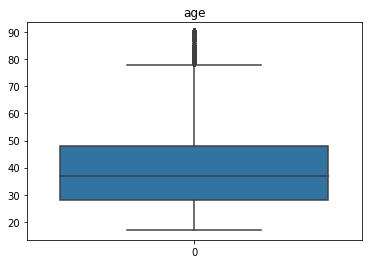

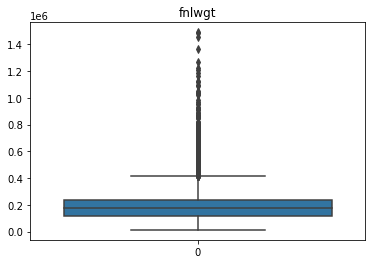

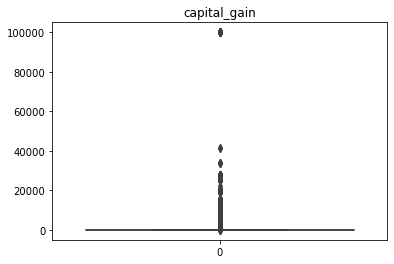

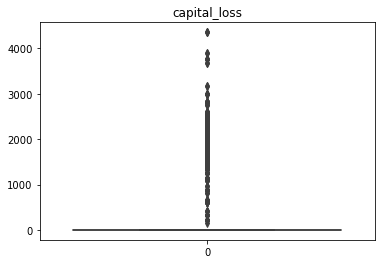

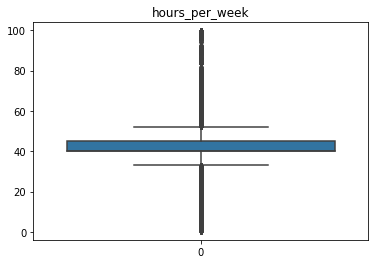

In [ ]:
#checking outliers
for i in  ['age','fnlwgt','capital_gain','capital_loss','hours_per_week']:
    plt.title(i)
    sns.boxplot(data=df[i])
    plt.show()


In [ ]:
df1 =df
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,Salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


#### Handling outliers with Age

In [ ]:
q1 = np.percentile(df1['age'],25,interpolation = 'midpoint')
q3 = np.percentile(df1['age'],75,interpolation ='midpoint')

IQR = q3 - q1
low_limit = q1 - 1.5*IQR
high_limit = q3+ 1.5*IQR

index = df1['age'][(df1['age']<low_limit)|(df1['age']>high_limit)].index
df1.drop(index,inplace =True)

### Handling outliers with fnlwgt

In [ ]:
q1 = np.percentile(df1['fnlwgt'],25,interpolation = 'midpoint')
q3 = np.percentile(df1['fnlwgt'],75,interpolation ='midpoint')

IQR = q3 - q1
low_limit = q1 - 1.5*IQR
high_limit = q3 + 1.5*IQR

index = df1['fnlwgt'][(df1['fnlwgt']<low_limit)|(df1['fnlwgt']>high_limit)].index
df1.drop(index,inplace =True)

### Handling outliers with Capital_gain

In [ ]:
q1 = np.percentile(df1['capital_gain'],25,interpolation = 'midpoint')
q3 = np.percentile(df1['capital_gain'],75,interpolation ='midpoint')

IQR = q3 - q1
low_limit = q1 - 1.5*IQR
high_limit = q3 + 1.5*IQR

index = df1['capital_gain'][(df1['capital_gain']<low_limit)|(df1['capital_gain']>high_limit)].index
df1.drop(index,inplace =True)

### Handling outliers with Capital_loss

In [ ]:
q1 = np.percentile(df1['capital_loss'],25,interpolation = 'midpoint')
q3 = np.percentile(df1['capital_loss'],75,interpolation ='midpoint')

IQR = q3 - q1
low_limit = q1 - 1.5*IQR
high_limit = q3 + 1.5*IQR

index = df1['capital_loss'][(df1['capital_loss']<low_limit)|(df1['capital_loss']>high_limit)].index
df1.drop(index,inplace =True)

### Handling outliers with Hours_per_week

In [ ]:
q1 = np.percentile(df1['hours_per_week'],25,interpolation = 'midpoint')
q3 = np.percentile(df1['hours_per_week'],75,interpolation ='midpoint')

IQR = q3 - q1
low_limit = q1 - 1.5*IQR
high_limit = q3 + 1.5*IQR

index = df1['hours_per_week'][(df1['hours_per_week']<low_limit)|(df1['hours_per_week']>high_limit)].index
df1.drop(index,inplace =True)

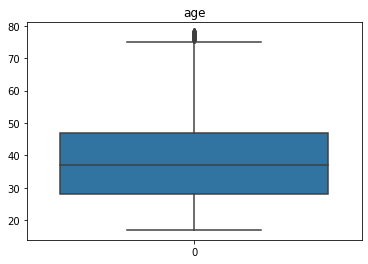

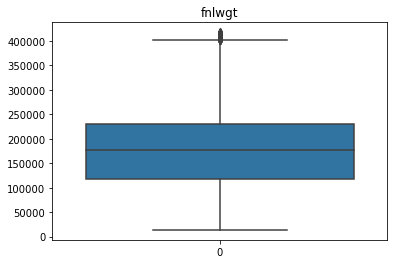

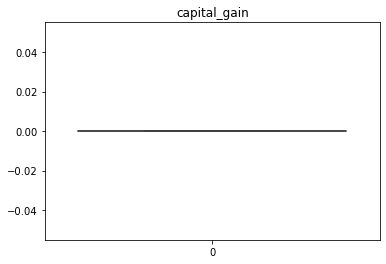

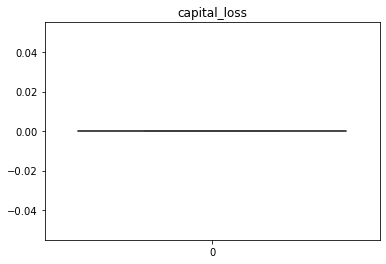

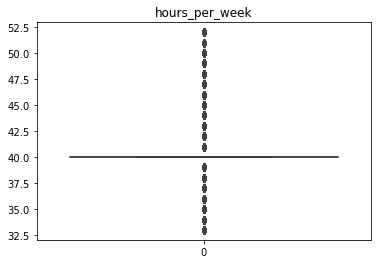

In [ ]:
#checking outliers

for i in  ['age','fnlwgt','capital_gain','capital_loss','hours_per_week']:
    plt.title(i)
    sns.boxplot(data=df1[i])
    plt.show()

### 5.Exploratory Data Analysis

##### Check descriptive statistics - Numerical columns

In [ ]:
df1.describe()

,age,fnlwgt,educational-num,capital_gain,capital_loss,hours_per_week
count,29612.000000,29612.000000,29612.000000,29612.0,29612.0,29612.000000
mean,38.306430,181242.372180,9.990207,0.0,0.0,41.443469
std,12.221412,87329.732998,2.487775,0.0,0.0,3.946667
min,17.000000,13769.000000,1.000000,0.0,0.0,33.000000
25%,28.000000,117222.000000,9.000000,0.0,0.0,40.000000
50%,37.000000,177083.000000,10.000000,0.0,0.0,40.000000
75%,47.000000,230961.000000,12.000000,0.0,0.0,40.000000
max,78.000000,417668.000000,16.000000,0.0,0.0,52.000000


##### Check descriptive statistics - categorical columns

In [ ]:
df1.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,gender,native_country,Salary
count,29612,29612,29612,29612,29612,29612,29612,29612,29612
unique,8,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22780,10458,13443,4731,11946,25041,19941,26956,23553


##### check 'education' & 'educational-num' columns

In [ ]:
df1['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', 'Bachelors',
       'Masters', 'Doctorate', '5th-6th', '10th', 'Assoc-voc', '7th-8th',
       '9th', 'Prof-school', '12th', '1st-4th', 'Preschool'], dtype=object)

In [ ]:
df1['educational-num'].unique()

array([ 7,  9, 12, 10, 13, 14, 16,  3,  6, 11,  4,  5, 15,  8,  2,  1],
      dtype=int64)

As we can see, 'education' & 'educational-num' both columns have similiar values
- 'education' has string values
- 'educational-num' has numerical values
- preschool  from education represents 1 in education num column , All HS- grad from education
column represnts 9 in education -num and likewise
-Both columns conveying same information
-so we can remove 'education-num' column

## 6.Feature Reduction

-while analyzing the dataset
-As we can see in 'descriptive statistics-Numerical columns'
      - 'capital gain' and 'capital loss' both columns have 75% data
- the column , education-num is the numerical version of column education , so also drop it*

In [ ]:
df1.drop(['capital_gain','capital_loss','educational-num'],axis = 1,inplace=True)
df1.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours_per_week,native_country,Salary
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
6,29,Private,227026,HS-grad,Never-married,Prof-specialty,Unmarried,Black,Male,40,United-States,<=50K
8,24,Private,369667,Some-college,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K


In [ ]:
df1.shape

(29612, 12)

**Now, we need to convert the categorical values to numeric for modeling.Looking at the Maritial status col**
**there are nearly 6 different values which would mean the same as two values of being married or not married,
-therefore we convert them into only two values**

In [ ]:
df1.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent','Never-married','Separated','Widowed'],
             ['divorced','married','married','married','not married','not married','not married'], inplace = True)
df1['marital-status'].value_counts()

married        13864
not married    11217
divorced        4531
Name: marital-status, dtype: int64

In [ ]:
#Before do further Analysis , we will seperate the data as numeric and categorical...so that our analysis becomes easy

##### Numeric Features

In [ ]:
numeric_data = df1.select_dtypes(include=np.number)
numeric_col = numeric_data.columns

In [ ]:
print('Numeric features: ')
print(numeric_data.head())
print('----'*20)

Numeric features: 
   age  fnlwgt  hours_per_week
0   25  226802              40
1   38   89814              50
2   28  336951              40
6   29  227026              40
8   24  369667              40
--------------------------------------------------------------------------------


##### Categorical features

In [ ]:
categorical_data = df1.select_dtypes(exclude=np.number)
categorical = categorical_data.columns
print('categorical: ')
print(categorical_data.head())
print('----'*20)

categorical: 
   workclass     education marital-status         occupation relationship  \
0    Private          11th    not married  Machine-op-inspct    Own-child   
1    Private       HS-grad        married    Farming-fishing      Husband   
2  Local-gov    Assoc-acdm        married    Protective-serv      Husband   
6    Private       HS-grad    not married     Prof-specialty    Unmarried   
8    Private  Some-college    not married      Other-service    Unmarried   

    race  gender native_country Salary  
0  Black    Male  United-States  <=50K  
1  White    Male  United-States  <=50K  
2  White    Male  United-States   >50K  
6  Black    Male  United-States  <=50K  
8  White  Female  United-States  <=50K  
--------------------------------------------------------------------------------


# 7.Data Visualization

### Univariate Analysis

#### Numeric Data:-

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'hours_per_week'}>, <AxesSubplot:>]],
      dtype=object)

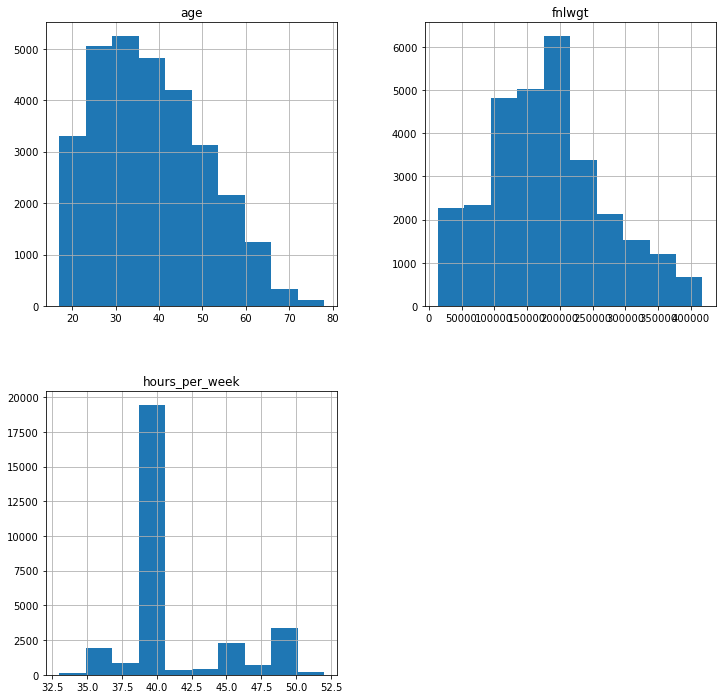

In [ ]:
#lets see hoe numeric data is distributed for every column
df1.hist(figsize=(12,12),sharex=False)

##### Findings

In [ ]:
#minimum age is 18 and maximum is 78 years, most of working age group lies between 20-40

##### categorical Data

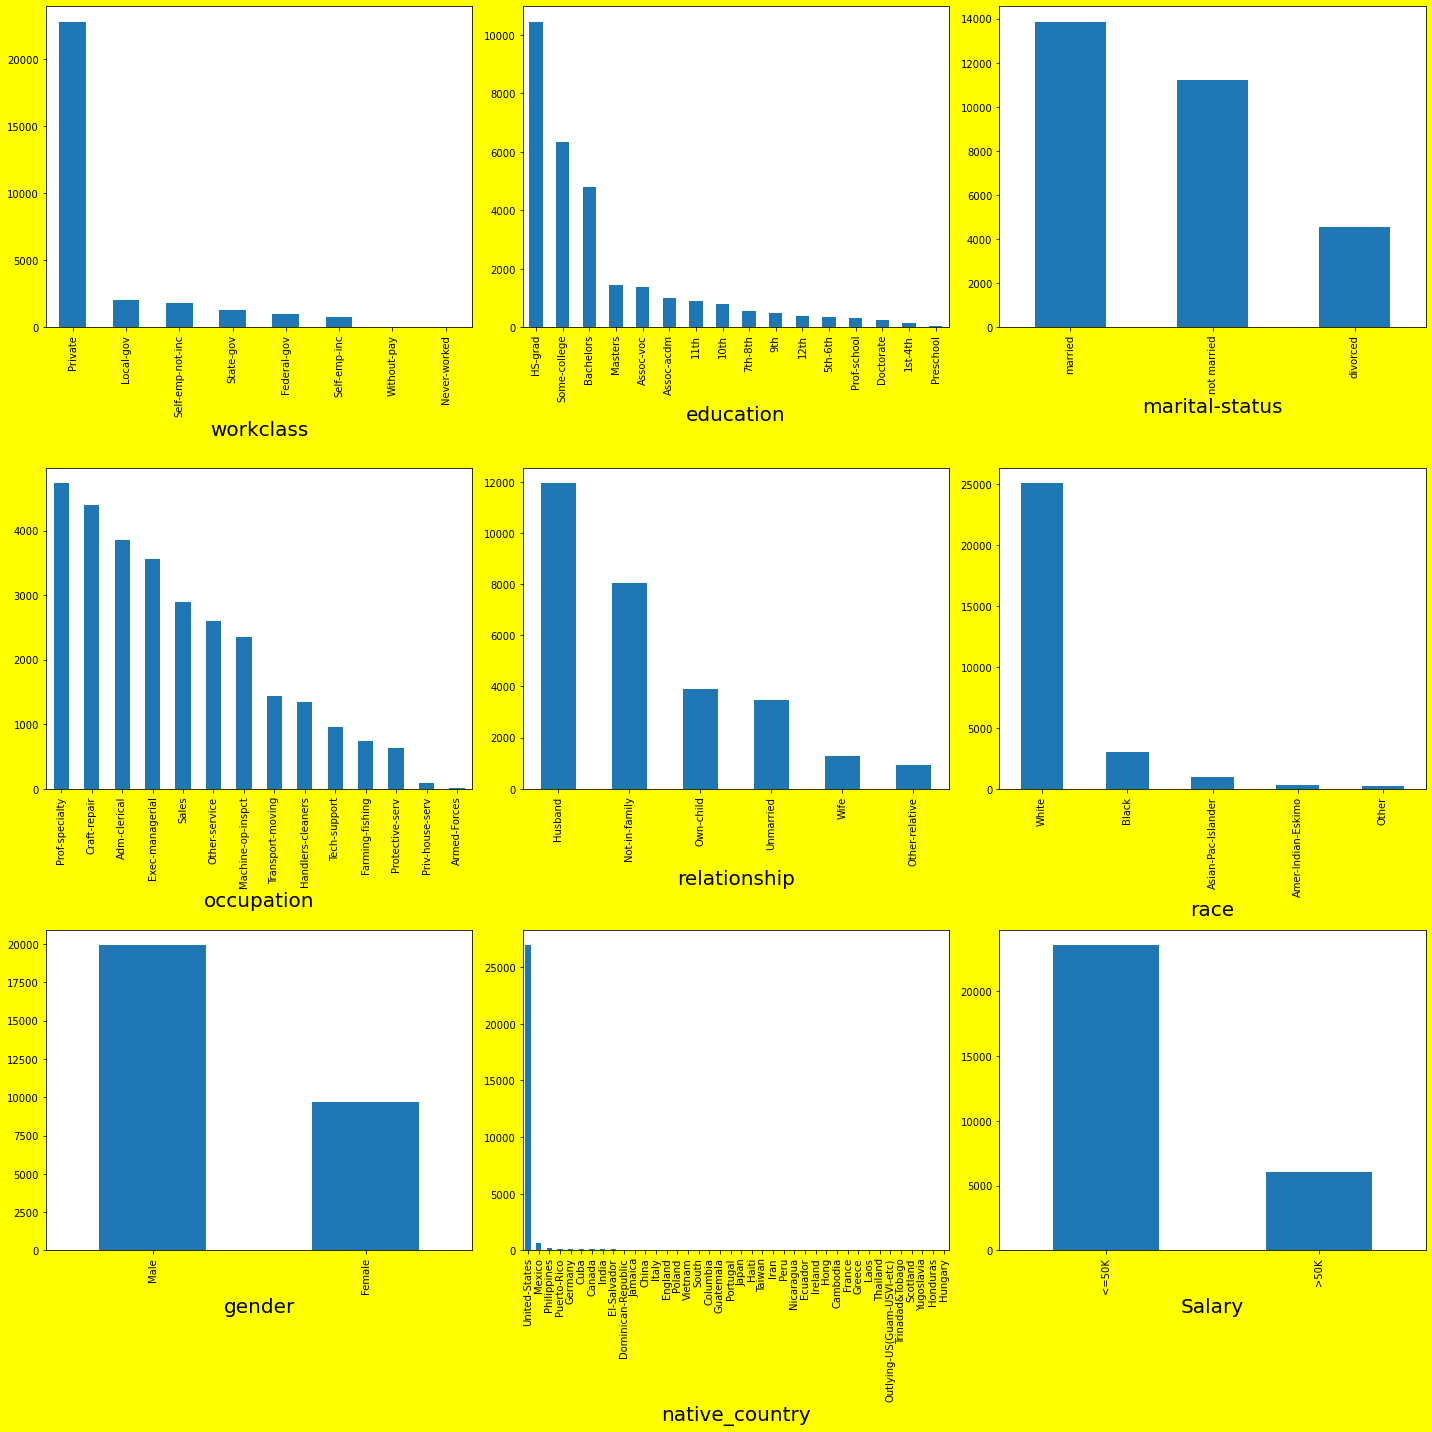

In [ ]:
plt.figure(figsize=(20,20),facecolor='yellow')
plotnumber =1

for column in categorical_data:
    if plotnumber <=16:
        ax = plt.subplot(3,3,plotnumber)
        categorical_data[column].value_counts().plot(kind='bar')
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.tight_layout()

#### Findings

### Bi-variate Analysis

In [ ]:
#plot numeric variable against salary variable

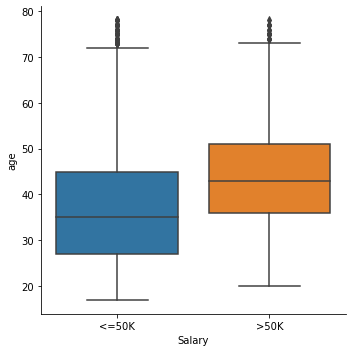

In [ ]:
sns.catplot(x='Salary',y='age',kind='box',data=df1)

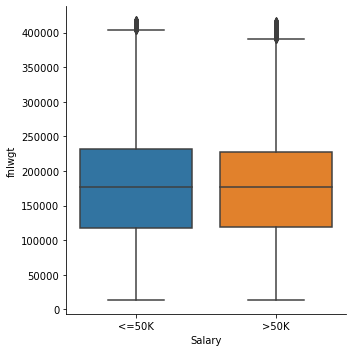

In [ ]:
sns.catplot(x='Salary',y='fnlwgt',kind='box',data=df1)

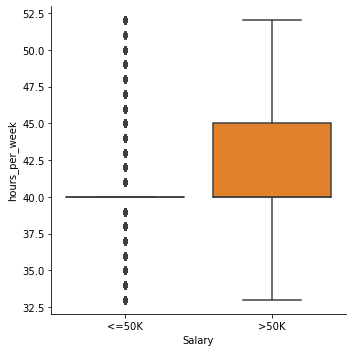

In [ ]:
sns.catplot(x='Salary',y='hours_per_week',kind='box',data=df1)

##### Findings

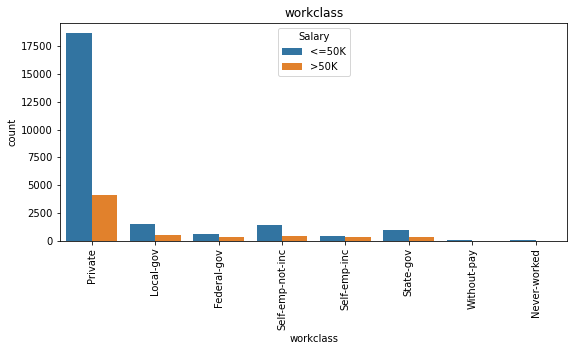

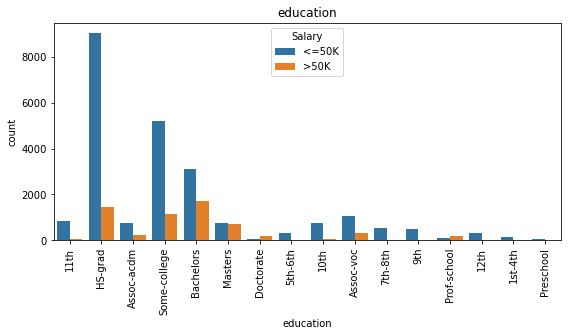

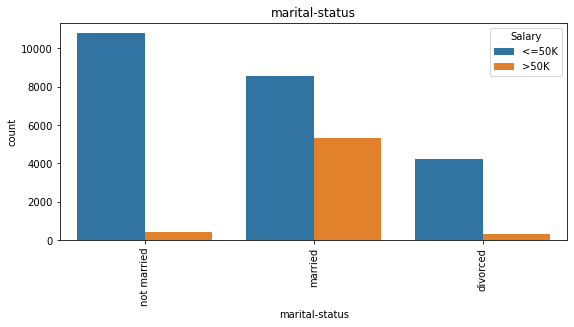

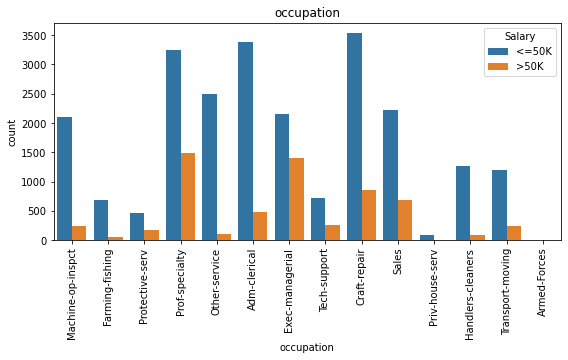

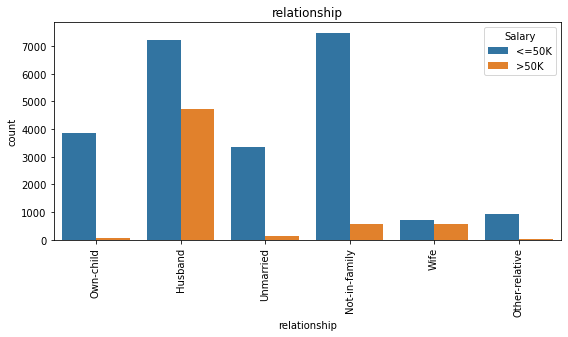

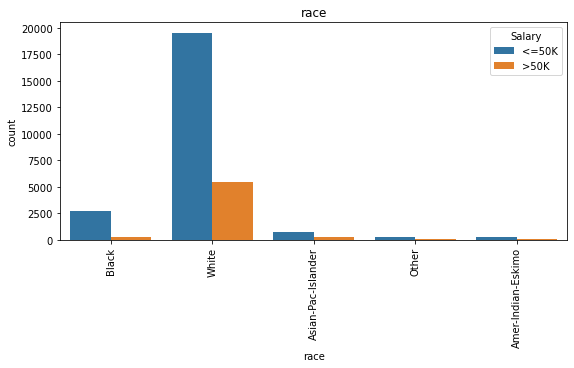

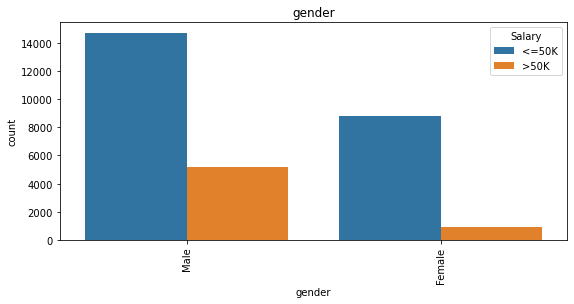

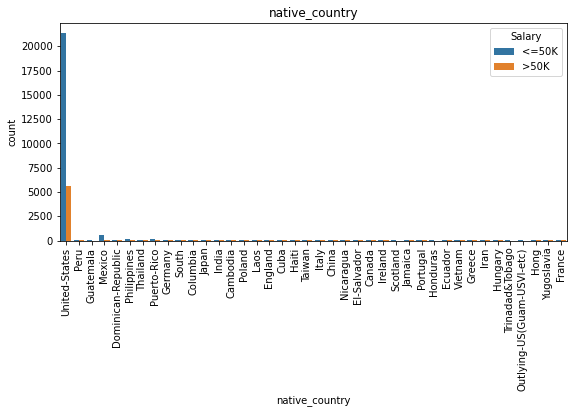

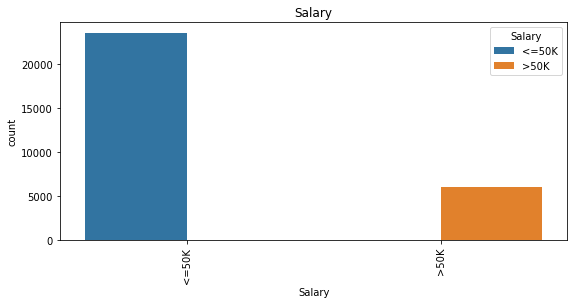

In [ ]:
for column in categorical_data:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=categorical_data[column],hue=categorical_data['Salary'],data=categorical_data)
    plt.title(column)
    plt.xticks(rotation=90)

In [ ]:
df1.corr()

,age,fnlwgt,hours_per_week
age,1.000000,-0.070365,0.050434
fnlwgt,-0.070365,1.000000,-0.018945
hours_per_week,0.050434,-0.018945,1.000000


### 8.Feature Engineering

In [ ]:
# education Category
df1.education= df1.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df1.education = df1.education.replace('HS-grad', 'high school')
df1.education = df1.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df1.education = df1.education.replace('Bachelors', 'undergrad')
df1.education = df1.education.replace('Masters', 'grad')
df1.education = df1.education.replace('Doctorate', 'doc')

In [ ]:
#salary
df1.Salary = df1.Salary.replace('<=50K',0)
df1.Salary = df1.Salary.replace('>50K',1)


In [ ]:
df1.corr()

,age,fnlwgt,hours_per_week,Salary
age,1.000000,-0.070365,0.050434,0.226044
fnlwgt,-0.070365,1.000000,-0.018945,-0.001791
hours_per_week,0.050434,-0.018945,1.000000,0.176685
Salary,0.226044,-0.001791,0.176685,1.000000


<AxesSubplot:>

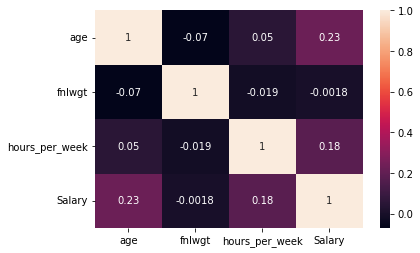

In [ ]:
sns.heatmap(df1.corr(),annot=True)

In [ ]:
df1['Salary'].value_counts()

0    23553
1     6059
Name: Salary, dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29612 entries, 0 to 48839
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29612 non-null  int64 
 1   workclass       29612 non-null  object
 2   fnlwgt          29612 non-null  int64 
 3   education       29612 non-null  object
 4   marital-status  29612 non-null  object
 5   occupation      29612 non-null  object
 6   relationship    29612 non-null  object
 7   race            29612 non-null  object
 8   gender          29612 non-null  object
 9   hours_per_week  29612 non-null  int64 
 10  native_country  29612 non-null  object
 11  Salary          29612 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.9+ MB


In [ ]:
#convert work class columns datatype to category datatype
df1['workclass'] = df1['workclass'].astype('category')

In [ ]:
#droping fnlwgt column bcz it doesnt convey individual related meaning

In [ ]:
df1.drop(['fnlwgt'],axis=1,inplace=True)

### 9. Encoding

In [ ]:
df1.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'hours_per_week', 'native_country',
       'Salary'],
      dtype='object')

In [ ]:
unique_checker(df1)

Unique values in age feature.
[25 38 28 29 24 36 26 58 43 40 34 54 56 23 65 22 17 20 44 39 21 63 33 30
 47 41 46 50 45 31 59 49 18 48 42 57 32 19 27 51 52 53 77 55 35 61 64 37
 68 62 73 66 60 67 71 74 78 69 70 75 72 76] 

****************************************
Unique values in workclass feature.
['Private', 'Local-gov', 'Federal-gov', 'Self-emp-not-inc', 'Self-emp-inc', 'State-gov', 'Without-pay', 'Never-worked']
Categories (8, object): ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'] 

****************************************
Unique values in education feature.
['school' 'high school' 'higher' 'undergrad' 'grad' 'doc'] 

****************************************
Unique values in marital-status feature.
['not married' 'married' 'divorced'] 

****************************************
Unique values in occupation feature.
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Other-service' 'Adm-cl

## One Hot Encoding

In [ ]:
one_hot_features = ['marital-status','gender']
df1 = pd.get_dummies(df1,columns=one_hot_features)
df1.head()

,age,workclass,education,occupation,relationship,race,hours_per_week,native_country,Salary,marital-status_divorced,marital-status_married,marital-status_not married,gender_Female,gender_Male
0,25,Private,school,Machine-op-inspct,Own-child,Black,40,United-States,0,0,0,1,0,1
1,38,Private,high school,Farming-fishing,Husband,White,50,United-States,0,0,1,0,0,1
2,28,Local-gov,higher,Protective-serv,Husband,White,40,United-States,1,0,1,0,0,1
6,29,Private,high school,Prof-specialty,Unmarried,Black,40,United-States,0,0,0,1,0,1
8,24,Private,higher,Other-service,Unmarried,White,40,United-States,0,0,0,1,1,0


### Label Encoding

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#convert categorical column into numeric
df1['workclass'] = le.fit_transform(df1['workclass'])
df1['education'] = le.fit_transform(df1['education'])
df1['occupation'] = le.fit_transform(df1['occupation'])
df1['relationship'] = le.fit_transform(df1['relationship'])
df1['race'] = le.fit_transform(df1['race'])
df1['native_country'] = le.fit_transform(df1['native_country'])

In [ ]:
df1.head()

,age,workclass,education,occupation,relationship,race,hours_per_week,native_country,Salary,marital-status_divorced,marital-status_married,marital-status_not married,gender_Female,gender_Male
0,25,3,4,6,3,2,40,37,0,0,0,1,0,1
1,38,3,2,4,0,4,50,37,0,0,1,0,0,1
2,28,1,3,10,0,4,40,37,1,0,1,0,0,1
6,29,3,2,9,4,2,40,37,0,0,0,1,0,1
8,24,3,3,7,4,4,40,37,0,0,0,1,1,0


### 9.Model Development & classification

In [ ]:
#moved the salary column to another variable

In [ ]:
target_salary = df1.pop('Salary')
df1.head()

,age,workclass,education,occupation,relationship,race,hours_per_week,native_country,marital-status_divorced,marital-status_married,marital-status_not married,gender_Female,gender_Male
0,25,3,4,6,3,2,40,37,0,0,1,0,1
1,38,3,2,4,0,4,50,37,0,1,0,0,1
2,28,1,3,10,0,4,40,37,0,1,0,0,1
6,29,3,2,9,4,2,40,37,0,0,1,0,1
8,24,3,3,7,4,4,40,37,0,0,1,1,0


# Logistic Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
#since this is a binary classification we will use log Regression

In [ ]:
#normalizing data
scaler = StandardScaler()
df2 = scaler.fit_transform(df1.values)

In [ ]:
# random state : Controls the shuffling applied to the data before applying the split.
X_train,X_test,y_train,y_test = train_test_split(df2,target_salary,test_size=0.2,random_state=42)

clf = LogisticRegression().fit(X_train,y_train)
clf

LogisticRegression()

In [ ]:
clf.score(X_test,y_test)

0.8028026338004389

In [ ]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4743
           1       0.51      0.19      0.28      1180

    accuracy                           0.80      5923
   macro avg       0.67      0.57      0.58      5923
weighted avg       0.76      0.80      0.77      5923



In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy for Logistic Regression is ',round(accuracy_score(y_test,clf.predict(X_test)),4))
print('Precision for Logistic Regression is ',round(precision_score(y_test,clf.predict(X_test),average='macro'),4))
print('Recall for Logistic Regression is ',round(recall_score(y_test,clf.predict(X_test),average='macro'),4))
print('F1-score for Logistic Regression is ',round(f1_score(y_test,clf.predict(X_test),average='macro'),4))

Accuracy for Logistic Regression is  0.8028
Precision for Logistic Regression is  0.6699
Recall for Logistic Regression is  0.5745
F1-score for Logistic Regression is  0.5841


In [ ]:
y_pred1 = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

Text(33.0, 0.5, 'Actual labels')

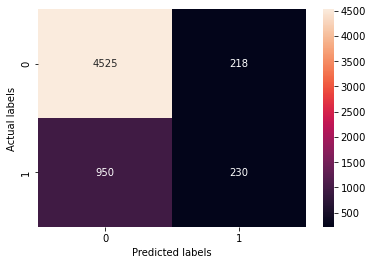

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')

## Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [ ]:
svc.score(X_train,y_train)

0.7940394275824222

In [ ]:
print('Accuracy is :',accuracy_score(y_test,y_pred))
precision_score(y_test,y_pred,average='weighted')

Accuracy is : 0.8007766334627723


0.6412432166999712

In [ ]:
f1_score(y_test,y_pred,average='weighted')

0.7121851814202005

In [ ]:
recall_score(y_test,y_pred,average='weighted')

0.8007766334627723

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[4743    0]
 [1180    0]]


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

In [ ]:
print('Accuracy on training data is : ',dt_model.score(X_train,y_train))

Accuracy on training data is :  0.9549157836970746


In [ ]:
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('precision is :',precision_score(y_test,y_pred,average='weighted'))
print('recall score is :',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is :',f1_score(y_test,y_pred,average='weighted'))

Accuracy is : 0.7945297990882998
precision is : 0.7900677207355189
recall score is : 0.7945297990882998
f1 score is : 0.792177524615414


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[4169  574]
 [ 643  537]]


## KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
n_neighbors = np.arange(2,18)
for i in n_neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=i,metric='minkowski')
    knn_model.fit(X_train,y_train)
    y_pred = knn_model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'Acuuracy values')

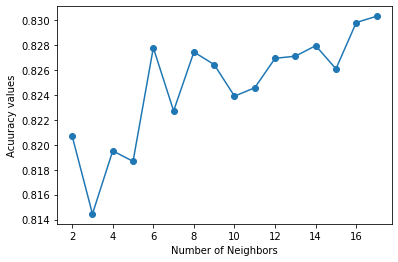

In [ ]:
plt.plot(n_neighbors,acc_values,'o-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Acuuracy values')

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7,metric='minkowski')
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print('Accuracy on training data is : ',knn_model.score(X_train,y_train))
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('precision is :',precision_score(y_test,y_pred,average='weighted'))
print('recall score is :',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is :',f1_score(y_test,y_pred,average='weighted'))

Accuracy on training data is :  0.8627633078644097
Accuracy is : 0.8227249704541617
precision is : 0.8125393175411284
recall score is : 0.8227249704541617
f1 score is : 0.8164911594858733


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[4316  427]
 [ 623  557]]


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
print('Accuracy on training data is : ',rf_model.score(X_train,y_train))

Accuracy on training data is :  0.9549157836970746


In [ ]:
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('precision is :',precision_score(y_test,y_pred,average='weighted'))
print('recall score is :',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is :',f1_score(y_test,y_pred,average='weighted'))

Accuracy is : 0.8215431369238562
precision is : 0.8121813088630733
recall score is : 0.8215431369238562
f1 score is : 0.8159428225351337


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[4303  440]
 [ 617  563]]


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print('Accuracy on training data is : ',gb.score(X_train,y_train))
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('precision is :',precision_score(y_test,y_pred,average='weighted'))
print('recall score is :',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is :',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is :  0.8513656127316476
Accuracy is : 0.8450109741684957
precision is : 0.8324097124224497
recall score is : 0.8450109741684957
f1 score is : 0.8347231367088387
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4743
           1       0.66      0.47      0.55      1180

    accuracy                           0.85      5923
   macro avg       0.77      0.70      0.73      5923
weighted avg       0.83      0.85      0.83      5923

[[4453  290]
 [ 628  552]]


# Model Prediction Accuracy table

In [ ]:
from tabulate import tabulate
table = [['Model','Accuracy'],['Logistic Regression',80],['KNN',82.2],['Decision Tree',79.4],['Random Forest',82.1],['SVM',80],['Gradient Boosting',84.5]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))


╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │       80   │
├─────────────────────┼────────────┤
│ KNN                 │       82.2 │
├─────────────────────┼────────────┤
│ Decision Tree       │       79.4 │
├─────────────────────┼────────────┤
│ Random Forest       │       82.1 │
├─────────────────────┼────────────┤
│ SVM                 │       80   │
├─────────────────────┼────────────┤
│ Gradient Boosting   │       84.5 │
╘═════════════════════╧════════════╛


## HyperParameter Tuning

### Hyper parameter tuning of model Random Forest

In [ ]:
#manual hyper parameter tuing
hyp_classifier = RandomForestClassifier(n_estimators = 300,criterion = 'entropy',max_features = 'sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)

In [ ]:
y_pred_2 = hyp_classifier.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred_2))

Accuracy: 0.8453486408914401


In [ ]:
#using Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(start=10,stop=1000,num=10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]
random_grid ={'n_estimators':n_estimators,
              'max_features' :max_features,
              'max_depth' :max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'criterion' : ['entropy','gini','log_loss']}

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf_randomCV = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)

In [ ]:
#fit the randomized model
rf_randomCV.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini',
                                                      'log_loss'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   ran

In [ ]:
rf_randomCV.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 1000,
 'criterion': 'gini'}

In [ ]:

rf_randomCV.best_estimator_

RandomForestClassifier(max_depth=1000, min_samples_leaf=4, n_estimators=1600)

In [ ]:
best_random = rf_randomCV.best_estimator_

In [ ]:
y_pred_3 = best_random.predict(X_test)
print('Accuracy:',accuracy_score(y_pred_3,y_pred_3))

Accuracy: 1.0


In [ ]:
#Using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion' : [rf_randomCV.best_params_['criterion']],
    'max_depth' : [rf_randomCV.best_params_['max_depth']],
    'max_features' :[rf_randomCV.best_params_['max_features']],
    'min_samples_leaf':[rf_randomCV.best_params_['min_samples_leaf'],
                        rf_randomCV.best_params_['min_samples_leaf']+2,
                        rf_randomCV.best_params_['min_samples_leaf']+4],
    'min_samples_split' : [rf_randomCV.best_params_['min_samples_split'],
                           rf_randomCV.best_params_['min_samples_split']+1,
                           rf_randomCV.best_params_['min_samples_split']+2],
    'n_estimators': [rf_randomCV.best_params_['n_estimators'],
                    rf_randomCV.best_params_['n_estimators']-100,
                    rf_randomCV.best_params_['n_estimators']-200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [1000], 'max_features': ['auto'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [2, 3, 4], 'n_estimators': [1600, 1500, 1400]}


In [ ]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid ,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [1000],
                         'max_features': ['auto'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [1600, 1500, 1400]},
             verbose=2)